# Elements of Convex Optimization 2024 - Homework 1

### Solution author: <Maria Musial, 156062>

The purpose of this notebook is to implement methods for univariate optimization. The notebook will use helper functions to create and draw functions (in [eco_hw1_helpers.py](eco_hw1_helpers.py) file, but there is no need to look at it).

This exercise requires **numpy**, **matplotlib** and **[autograd](https://github.com/HIPS/autograd)** libraries:

In [1]:
!pip install numpy matplotlib autograd

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/49.3 kB ? eta -:--:--
   ---------------------------------------- 49.3/49.3 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/491.3 kB ? eta -:--:--
   ----- ---------------------------------- 71.7/491.3 kB ? eta -:--:--
   ----- ---------------------------------- 71.7/491.3 kB ? eta -:--:--
   ----- ---------------------------------- 71.7/491.3 kB ? eta -:--:--
   ------------------- -------------------- 235.5/491.3 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------  481.3/491.3 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 491.3/491.3 kB 2.2 MB/s eta 0:00:00


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [2]:
# a line making the graphs show up in the notebook
# you can safely ignore it (but run it!).
%matplotlib inline

# Some important imports:
from eco_hw1_helpers import Function

# Bogus search

In [3]:
# Sample implementation of algorithm that assumes that minimum is in the middle of the domain or at 0 and actually doesn't
# search very extensively.
# as arguments it takes the function object and number of function calls to perform
# It returns a tuple with all visited points in order of visit(for plotting purposes) and the minimizer it "found"
def bogus_search(function: Function, n: int):
    a, b = function.domain
    m = (a + b) / 2
    bogus_visited_points_in_order = [m]
    m_value = function.evaluate(m)
    bogus_minimizer = m
    if a <= 0 <= b and n > 1:
        bogus_visited_points_in_order.append(0)
        if m_value > function.evaluate(0):
            bogus_minimizer = 0

    return bogus_visited_points_in_order, bogus_minimizer

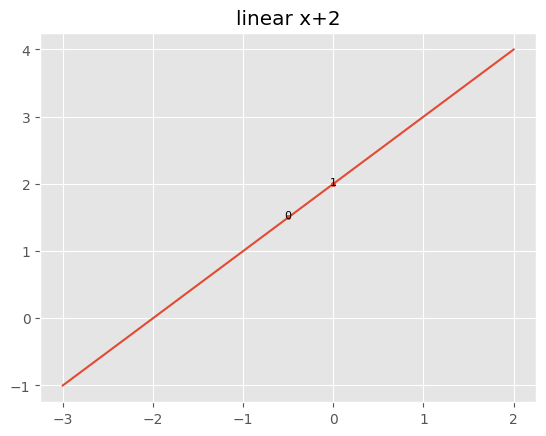

In [5]:
# To test your code first create some function, e.g. a linear function:

f = Function(lambda x: x+2,
             domain=(-3,2),
             name="linear x+2")

# Run the solution:
max_steps = 10
points, solution = bogus_search(f, max_steps)

# The function will plot itself and all points that where searched in order of visit
# By default it will annotate first and last 10 points.
f.plot(points=points)


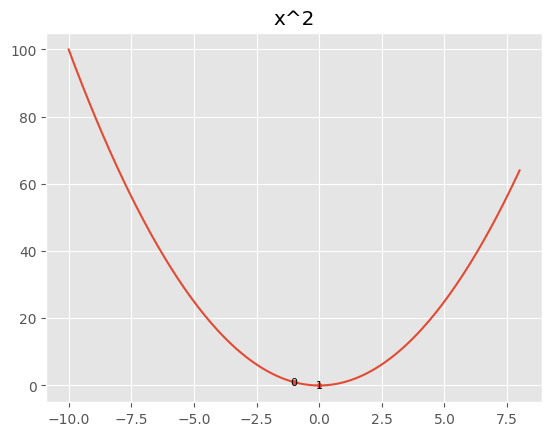

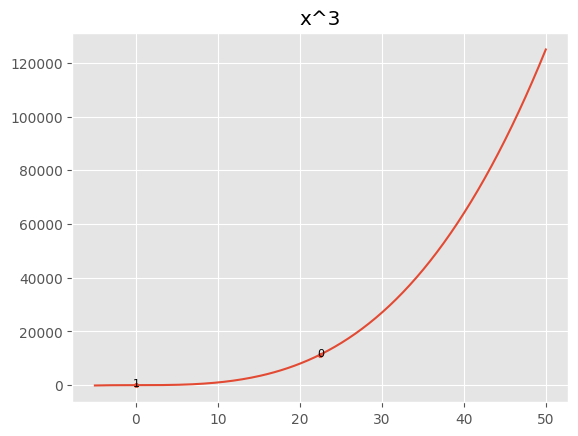

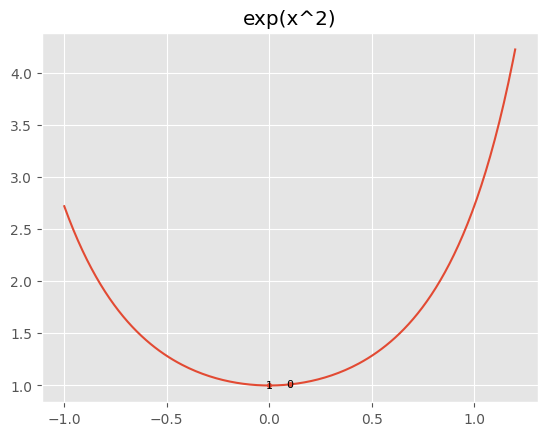

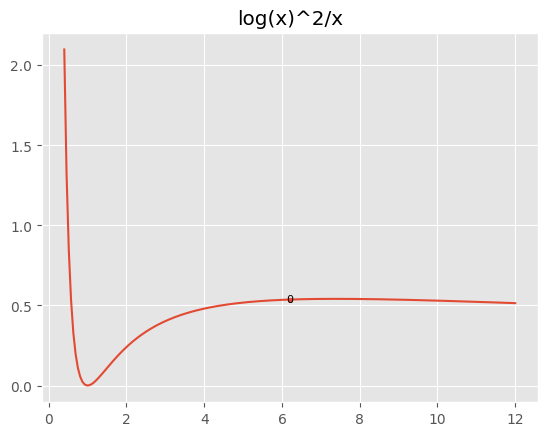

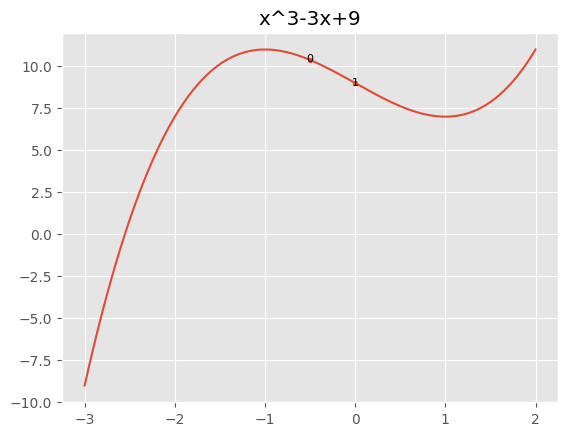

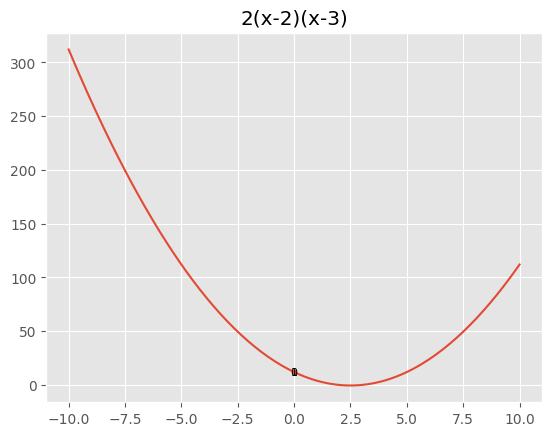

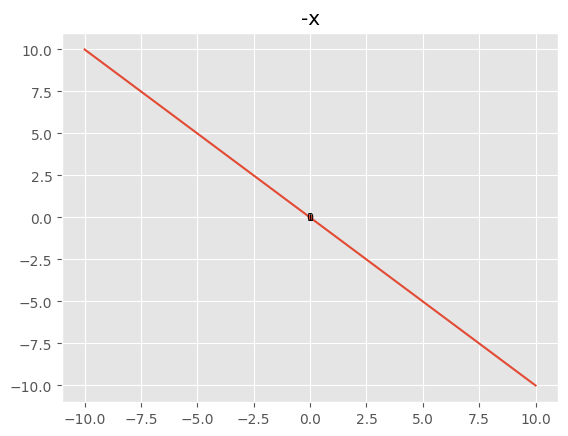

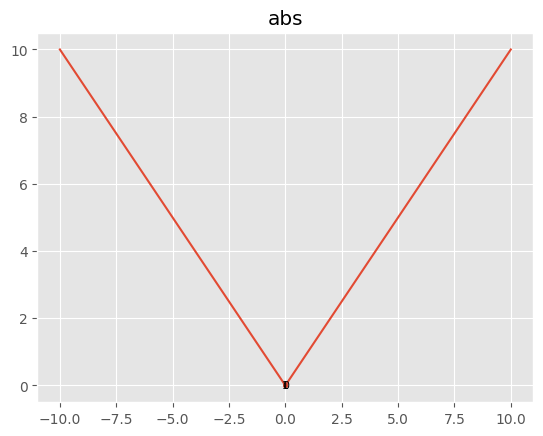

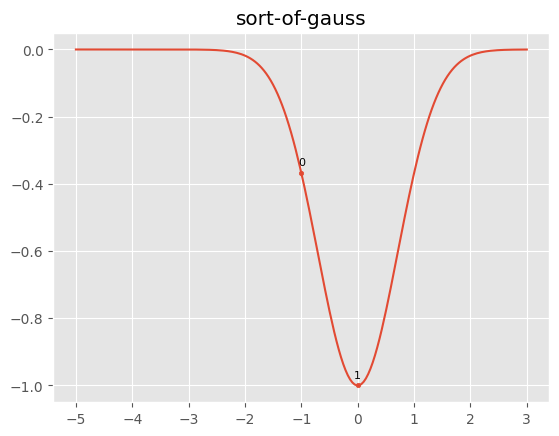

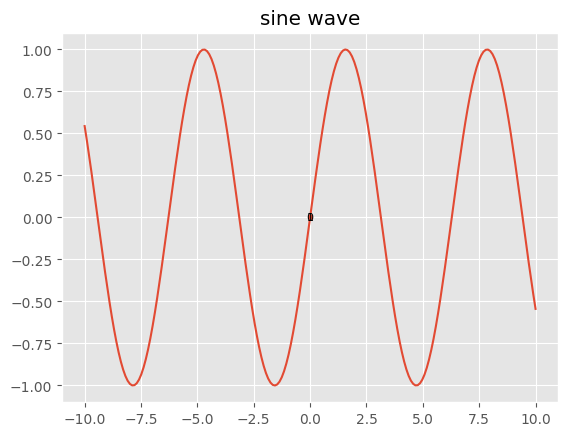

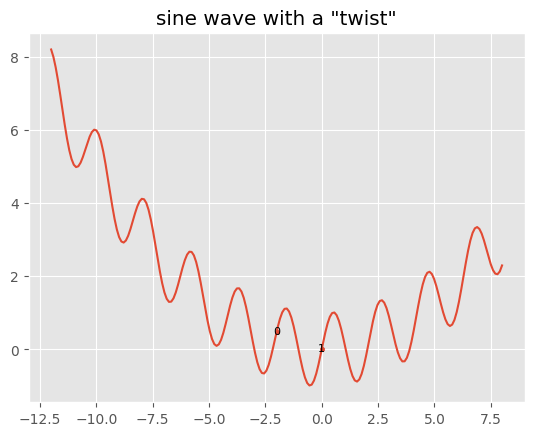

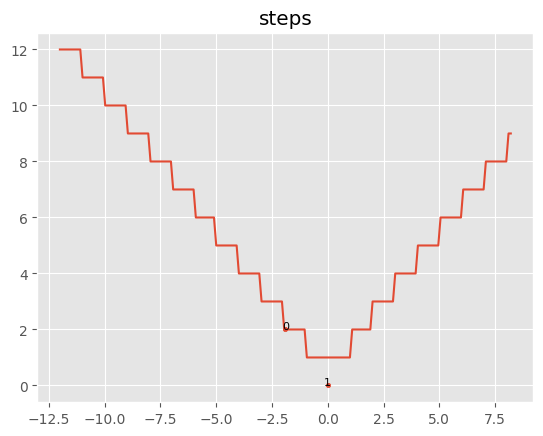

In [6]:
#You can test predefined functions and observe what happens
#(for methods you implement not bogus search)

# Later you can run predefined functions given in the file
from eco_hw1_helpers import functions
for f in functions:
    points, solution = bogus_search(f, max_steps)
    f.plot(points=points)

# Uniform search

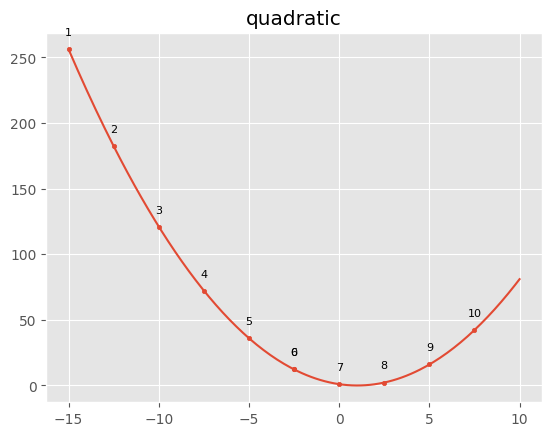

In [4]:
# Your implementation of uniform search here
from eco_hw1_helpers import Function
def unfiorm_search(function: Function, n: int):
    a, b = function.domain
    m = (a+b)/2
    minimizer = m
    evaluated = [m]

    for i in range(n):
        midpoint = a + (b-a) * i / n
        if function.evaluate(midpoint) < function.evaluate(minimizer):
            minimizer = midpoint
        evaluated.append(midpoint)       

    return evaluated, minimizer

f = Function(lambda x: x**2-2*x+1,
             domain=(-15,10),
             name="quadratic")

# Run the solution:
max_steps = 10
points, solution = unfiorm_search(f, max_steps)

f.plot(points=points)

# Random search

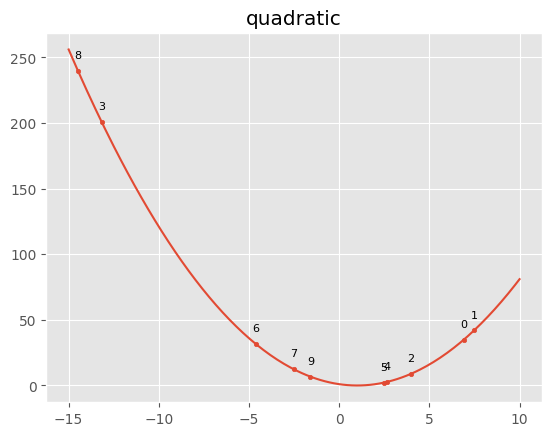

In [6]:
# Your implementation of random search here
def random_search(function: Function, n: int):
    import random
    a, b = function.domain
    evaluated = []
    minimizer = a
    for _ in range(n):
        xn = random.uniform(a, b)
        if function.evaluate(xn) < function.evaluate(minimizer):
            minimizer = xn
        evaluated.append(xn)

    return evaluated, minimizer

f = Function(lambda x: x**2-2*x+1,
             domain=(-15,10),
             name="quadratic")

# Run the solution:
max_steps = 10
points, solution = random_search(f, max_steps)

f.plot(points=points)

# Dichotomous search


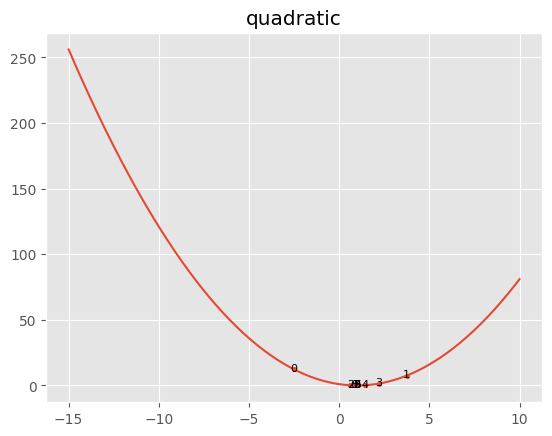

In [7]:
# Your implementation of dichotomous search here
def dichotomous_search(function: Function, n: int):

    a, b = function.domain
    evaluated = []
    minimizer = (a + b)/2
    for _ in range(n):
        xn = (a + b) / 2
        if function.evaluate(xn - 0.01) < function.evaluate(xn + 0.01):
            b = xn
            minimizer = min(a, xn)
        else:
            a = xn
            minimizer = max(b, xn)
        evaluated.append(xn)

    return evaluated, minimizer

f = Function(lambda x: x**2-2*x+1,
             domain=(-15,10),
             name="quadratic")

# Run the solution:
max_steps = 10
points, solution = dichotomous_search(f, max_steps)

f.plot(points=points)

# Bisection search

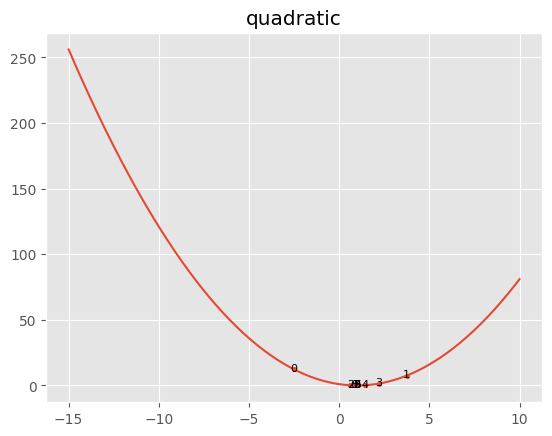

In [8]:
# Your implementation of bisection search here
# Recall that bisection uses derivative, you can access it by using
# function.evaluate_derivative(x).
def bisection_search(function: Function, n: int):
    
    a, b = function.domain
    evaluated = []
    minimizer = (a + b)/2
    for _ in range(n):
        xn = (a + b) / 2
        if function.evaluate_derivative(xn) > 0:
            b = xn
            minimizer = min(a, xn)
        else:
            a = xn
            minimizer = max(b, xn)
        evaluated.append(xn)

    return evaluated, minimizer

f = Function(lambda x: x**2-2*x+1,
             domain=(-15,10),
             name="quadratic")

# Run the solution:
max_steps = 10
points, solution = bisection_search(f, max_steps)

f.plot(points=points)

# Golden-section search

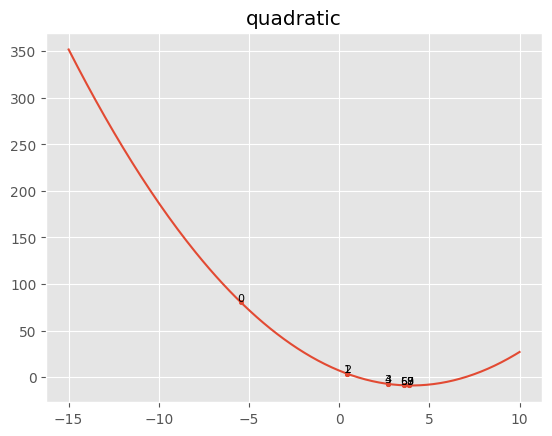

3.895035093610672


In [14]:
# Your implementation of golden-section search here
def golden_sectio_search(function: Function, n: int):
    from math import sqrt
    a, b = function.domain
    evaluated = []
    minimizer = (a + b) /2
    alpha = (sqrt(5)-1)/2
    for _ in range(n):
        xl = b - ( b - a ) * alpha
        xr = a + (b - a) * alpha
        if function.evaluate(xl) < function.evaluate(xr):
            b = xr
            minimizer = min(a, xr)
        else:
            a = xl
            minimizer = min(a, xr)
        evaluated.append(minimizer)

    return evaluated, minimizer

f = Function(lambda x: x**2-2*x+1,
             domain=(-15,10),
             name="quadratic")
             

# Run the solution:
max_steps = 10
points, solution = golden_sectio_search(f, max_steps)

f.plot(points=points)
print(solution)